# IMPORT THE REQUIRED LIBRARIES

In [1]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Visualization

from sklearn.preprocessing import PowerTransformer  # Data transformation
from sklearn.feature_selection import mutual_info_classif  # Feature selection
from sklearn.metrics import (accuracy_score,               # Metrics
                             ConfusionMatrixDisplay, 
                             classification_report, 
                             confusion_matrix, 
                             auc, roc_curve, 
                             mean_squared_error)  
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# READING THE DATA

In [2]:
# Load training and test data
x_train=pd.read_csv(r"Train_60 (1)\Train_60\Train_60\X_Train_Data_Input.csv")
y_train=pd.read_csv(r"Train_60 (1)\Train_60\Train_60\Y_Train_Data_Target.csv")
x_test=pd.read_csv(r"Test_20 (1)\Test_20\Test_20\X_Test_Data_Input.csv")
y_test=pd.read_csv(r"Test_20 (1)\Test_20\Test_20\Y_Test_Data_Target.csv")

In [3]:
# Display the first few rows of the training feature dataset
x_train.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [4]:
# Display the first few rows of the training feature dataset
y_train.head()

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0
3,59f9b981472d97342587fb3e6392aeb1,1
4,f6317cf7ecf126859804eddff279aead,0


# DATA ANALYSIS

In [5]:
# Display the dimensions of the training feature dataset
x_train.shape

(785133, 23)

In [6]:
# Display the dimensions of the training target dataset
y_train.shape

(785133, 2)

In [7]:
# Display the dimensions of the testing feature dataset
x_test.shape

(261712, 23)

In [8]:
# Display the dimensions of the testing target dataset
y_test.shape

(261712, 2)

In [9]:
# Summary of training features
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

In [10]:
# Summary of testing features
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        261712 non-null  object 
 1   Column0   261710 non-null  float64
 2   Column1   261712 non-null  int64  
 3   Column2   261712 non-null  float64
 4   Column3   219478 non-null  float64
 5   Column4   219002 non-null  float64
 6   Column5   206053 non-null  float64
 7   Column6   260478 non-null  float64
 8   Column7   261712 non-null  float64
 9   Column8   260478 non-null  float64
 10  Column9   17859 non-null   float64
 11  Column10  261712 non-null  int64  
 12  Column11  261712 non-null  int64  
 13  Column12  261712 non-null  int64  
 14  Column13  261712 non-null  int64  
 15  Column14  140033 non-null  float64
 16  Column15  256227 non-null  float64
 17  Column16  261712 non-null  float64
 18  Column17  261712 non-null  int64  
 19  Column18  261712 non-null  float64
 20  Colu

In [11]:
# Statistical summary of training features
x_train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.363122,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.480900,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


In [12]:
# Statistical summary of testing features
x_test.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,261710.000000,261712.000000,261712.000000,219478.000000,219002.000000,206053.000000,260478.000000,261712.000000,260478.000000,17859.000000,...,261712.000000,261712.000000,140033.000000,256227.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000,261712.000000
mean,0.441684,1321.450530,2956.365153,0.001422,0.002494,0.000998,0.003269,-0.000461,0.000477,-0.008717,...,0.362077,0.327020,0.001313,0.001088,0.001169,0.273419,0.148262,0.018574,0.009633,0.002709
std,1.168206,908.290073,2147.398218,0.999297,0.998968,1.194067,1.003476,0.957254,0.897452,0.807577,...,0.480602,0.469125,0.024071,0.197184,0.034174,3.362045,0.432855,0.135015,0.097673,0.051978
min,0.000000,-933.000000,-57.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,0.000000,-6.330084,-49.783222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,513.000000,1131.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086591,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2716.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.127514,-0.081951,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2436.000000,4478.000000,0.678139,0.701403,-0.007468,-0.363713,-0.015607,0.627312,-0.063544,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2501.000000,9977.000000,0.678139,0.701403,357.204763,3.440527,187.807115,120.465103,51.780491,...,1.000000,1.000000,3.649944,0.003551,1.000000,556.000000,12.000000,1.000000,1.000000,1.000000


In [13]:
# Count of duplicate rows in training features
x_train.duplicated().sum()

0

In [14]:
# Count of duplicate rows in testing features
x_test.duplicated().sum()

0

In [15]:
# Count of missing values in training features
x_train.isnull().sum()

ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [16]:
# Count of missing values in testing features
x_test.isnull().sum()

ID               0
Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

# DATA CLEANING

### TRAINING DATA

<Axes: >

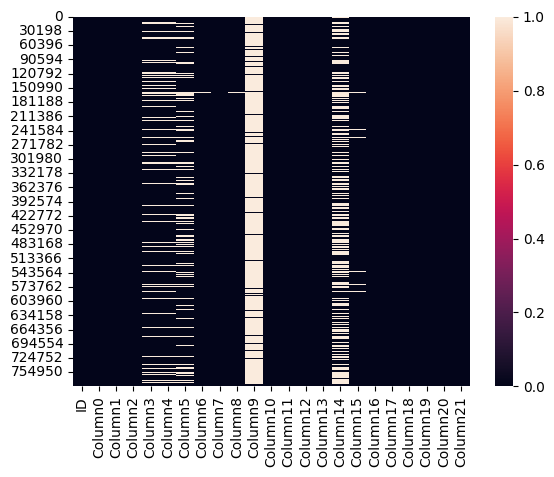

In [17]:
# Display a heatmap to visualize missing values in the training dataset
sns.heatmap(x_train.isnull())

#### • COLUMN 0

In [18]:
x_train["Column0"].fillna(x_train["Column0"].ffill(),inplace=True) # Forward fill missing values

In [19]:
pt = PowerTransformer(method='yeo-johnson') # Applying Power Transformation to reduce skewness
x_train['Column0'] = pt.fit_transform(x_train[['Column0']])

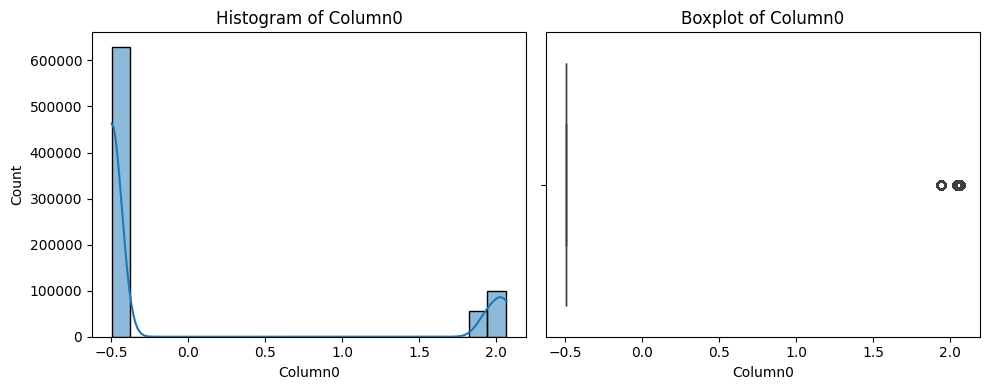

In [20]:
# Plot histogram and boxplot for 'Column0' in the training dataset
column_data = x_train['Column0']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column0')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column0')
plt.tight_layout()
plt.show()

#### • COLUMN 3

In [21]:
# Forward fill missing values in 'Column3'
x_train["Column3"].fillna(x_train["Column3"].ffill(), inplace=True)

In [22]:
# Apply Yeo-Johnson transformation to 'Column3'
x_train['Column3'] = pt.fit_transform(x_train[['Column3']])

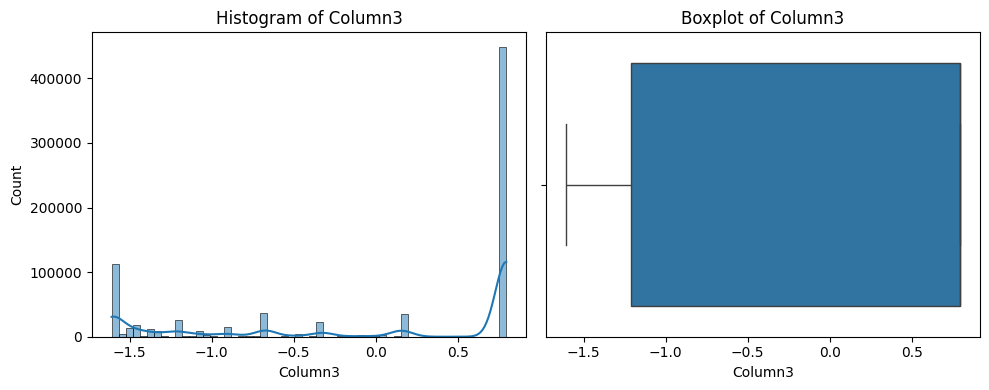

In [23]:
# Plot histogram and boxplot for 'Column3'
column_data = x_train['Column3']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column3')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column3')
plt.tight_layout()
plt.show()

#### • COLUMN 4

In [24]:
# Fill missing values in 'Column4' with the column mean
x_train["Column4"].fillna(x_train["Column4"].mean(), inplace=True)

In [25]:
# Apply power transformation to 'Column4'
x_train['Column4'] = pt.fit_transform(x_train[['Column4']])

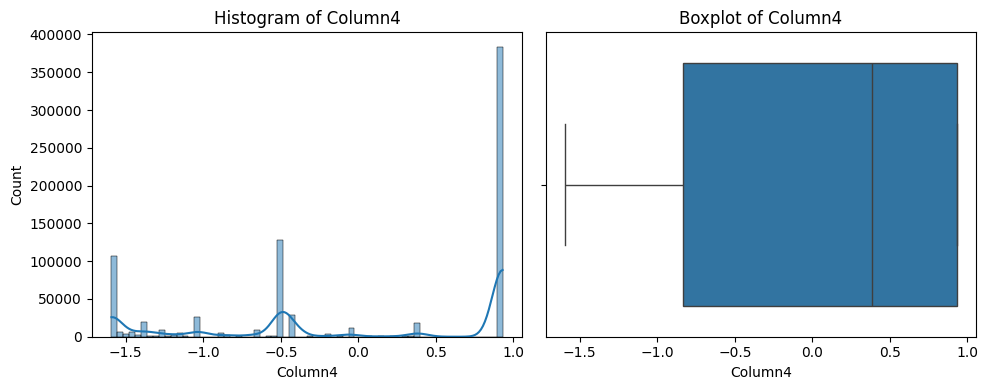

In [26]:
# Plot histogram and boxplot for 'Column4'
column_data = x_train['Column4']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column4')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column4')
plt.tight_layout()
plt.show()

#### • COLUMN 5

In [27]:
# Forward fill missing values in 'Column5'
x_train["Column5"].fillna(x_train["Column5"].ffill(), inplace=True)

In [28]:
# Apply Yeo-Johnson transformation to 'Column5'
x_train['Column5'] = pt.fit_transform(x_train[['Column5']])

In [29]:
# Remove outliers from 'Column5' using IQR
Q1 = x_train['Column5'].quantile(0.25)
Q3 = x_train['Column5'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

x_train = x_train[(x_train['Column5'] >= lower_bound) & (x_train['Column5'] <= upper_bound)]

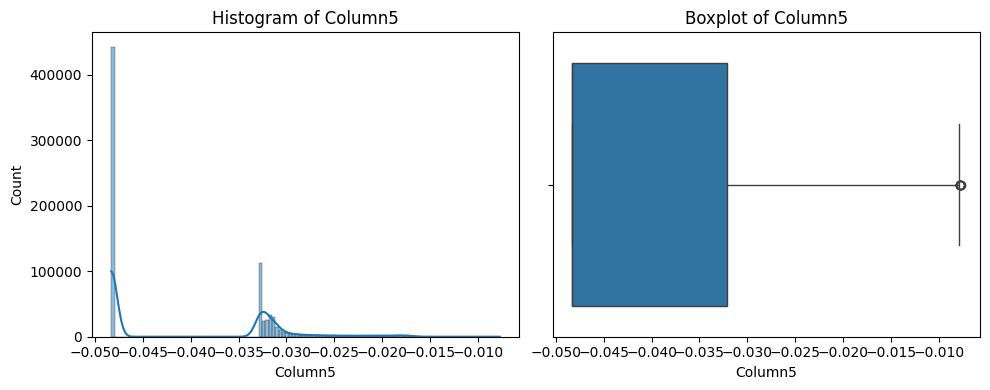

In [30]:
# Plot histogram and boxplot for 'Column5'
column_data = x_train['Column5']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column5')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column5')
plt.tight_layout()
plt.show()

#### • COLUMN 6

In [31]:
# Fill missing values in 'Column6' with the column median
x_train["Column6"].fillna(x_train["Column6"].median(), inplace=True)

In [32]:
# Apply Yeo-Johnson transformation to 'Column6'
x_train['Column6'] = pt.fit_transform(x_train[['Column6']])

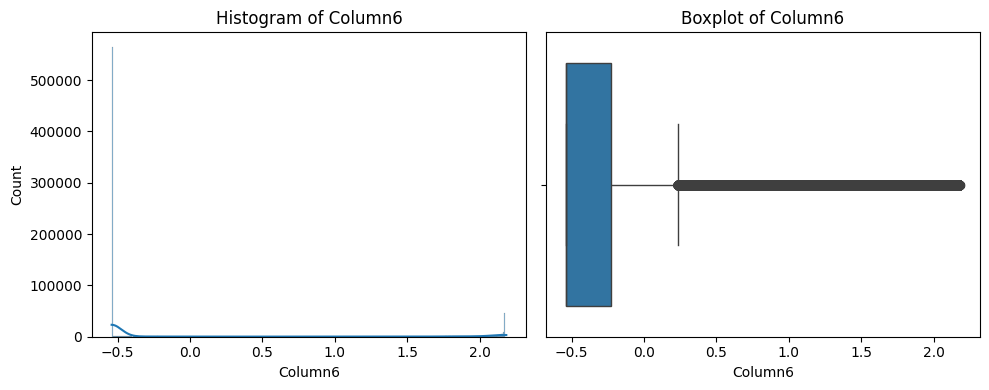

In [33]:
# Plot histogram and boxplot for 'Column6'
column_data = x_train['Column6']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column6')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column6')
plt.tight_layout()
plt.show()

#### • COLUMN 8

In [34]:
# Fill missing values in 'Column8' with the column median
x_train["Column8"].fillna(x_train["Column8"].median(), inplace=True)

In [35]:
# Apply Yeo-Johnson transformation to 'Column8'
x_train['Column8'] = pt.fit_transform(x_train[['Column8']])

In [36]:
# Remove outliers from 'Column8' using IQR
Q1 = x_train['Column8'].quantile(0.25)
Q3 = x_train['Column8'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

x_train = x_train[(x_train['Column8'] >= lower_bound) & (x_train['Column8'] <= upper_bound)]

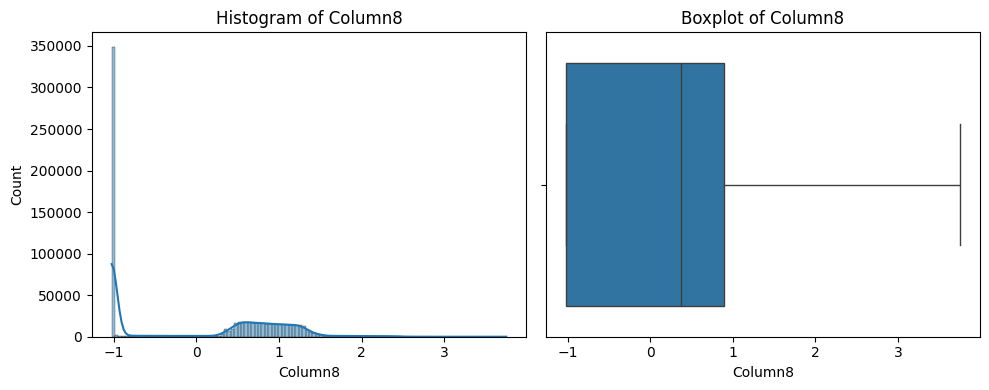

In [37]:
# Plot histogram and boxplot for 'Column8'
column_data = x_train['Column8']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column8')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column8')
plt.tight_layout()
plt.show()

#### • COLUMN 9

In [38]:
# Fill missing values in 'Column9' with the column median
x_train["Column9"].fillna(x_train["Column9"].median(), inplace=True)

In [39]:
# Apply Yeo-Johnson transformation to 'Column9'
x_train['Column9'] = pt.fit_transform(x_train[['Column9']])

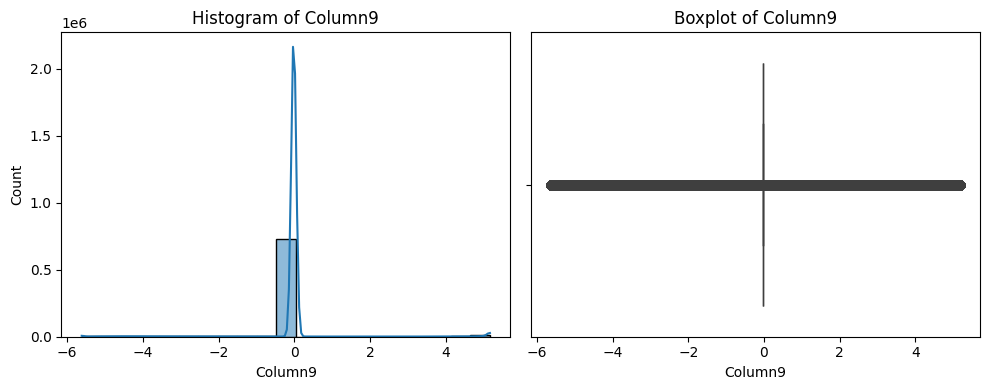

In [40]:
# Plot histogram and boxplot for 'Column9'
column_data = x_train['Column9']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column9')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column9')
plt.tight_layout()
plt.show()

#### • COLUMN 14

In [41]:
# Count occurrences of each value in 'Column14'
x_train['Column14'].value_counts()

Column14
0.001351    135558
0.001351     34862
0.001351      4951
0.001351      3190
0.001351      2577
             ...  
0.001350         1
0.001350         1
0.001350         1
0.001351         1
0.001351         1
Name: count, Length: 42119, dtype: int64

In [42]:
# Fill missing values in 'Column14' with the most repeated value (0.001351)
x_train["Column14"].fillna(0.001351, inplace=True)

In [43]:
# Apply Yeo-Johnson transformation to 'Column14'
x_train['Column14'] = pt.fit_transform(x_train[['Column14']])

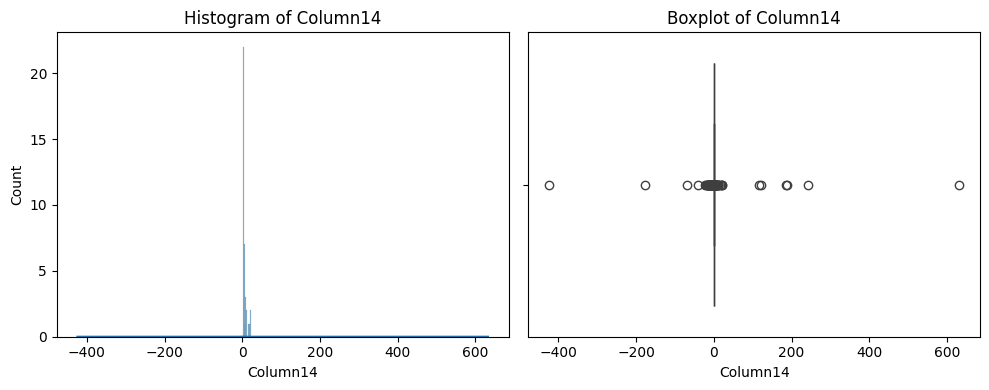

In [44]:
# Plot histogram and boxplot for 'Column14'
column_data = x_train['Column14']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0], binrange=(1,50))
axes[0].set_title('Histogram of Column14')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column14')
plt.tight_layout()
plt.show()

#### • COLUMN 15

In [45]:
# Count occurrences of each value in 'Column15'
x_train["Column15"].value_counts()

Column15
0.00339    663634
0.00339      2995
0.00339      1859
0.00339      1539
0.00339       983
            ...  
0.00339         1
0.00339         1
0.00339         1
0.00339         1
0.00339         1
Name: count, Length: 65950, dtype: int64

In [46]:
# Fill missing values in 'Column15' with the most frequent value (0.00339)
x_train["Column15"].fillna(0.00339, inplace=True)

In [47]:
# Apply Yeo-Johnson transformation to 'Column15'
x_train["Column15"] = pt.fit_transform(x_train[["Column15"]])

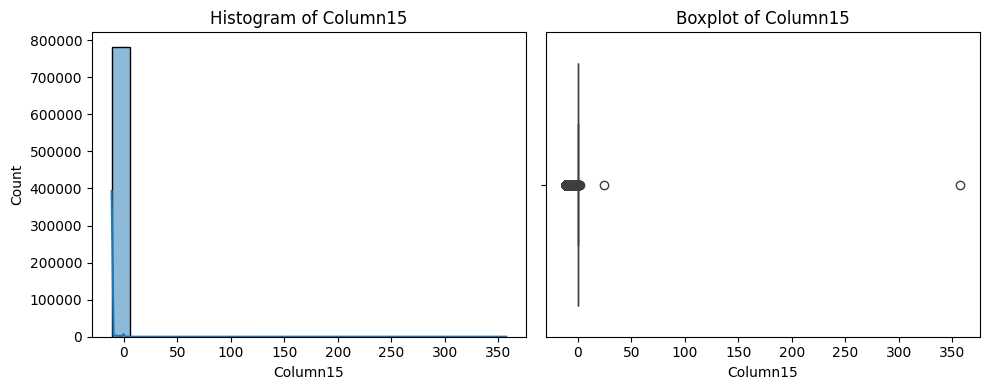

In [48]:
# Plot histogram and boxplot for 'Column15'
column_data = x_train['Column15']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column15')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column15')
plt.tight_layout()
plt.show()

In [49]:
# Reset the index of the training dataset
x_train.reset_index(drop=True, inplace=True)

In [50]:
# List columns with missing values in the training dataset
x_train.columns[x_train.isnull().any()]

Index([], dtype='object')

<Axes: >

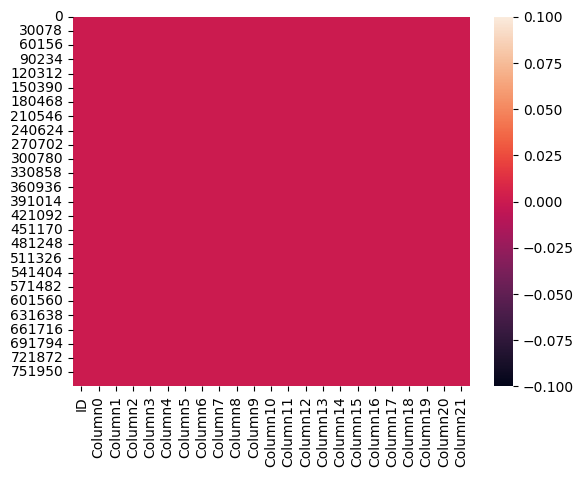

In [51]:
# Visualize missing values in the training dataset with a heatmap
sns.heatmap(x_train.isnull())

## TESTING DATA

<Axes: >

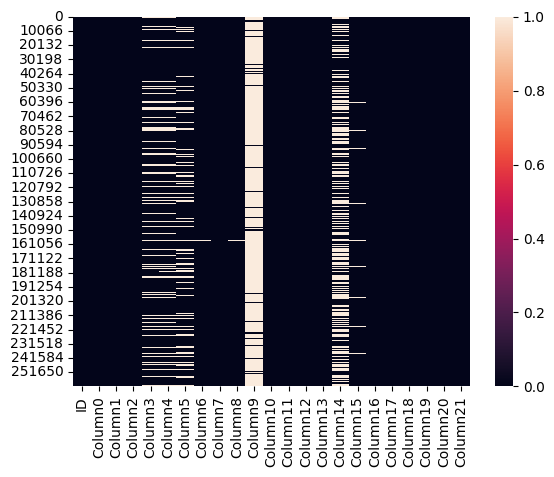

In [52]:
# Display a heatmap to visualize missing values in the test dataset
sns.heatmap(x_test.isnull())

#### • COLUMN 0

In [53]:
# Forward fill missing values in 'Column0' and apply Yeo-Johnson transformation
x_test["Column0"].fillna(x_test["Column0"].ffill(), inplace=True)
x_test['Column0'] = pt.fit_transform(x_test[['Column0']])

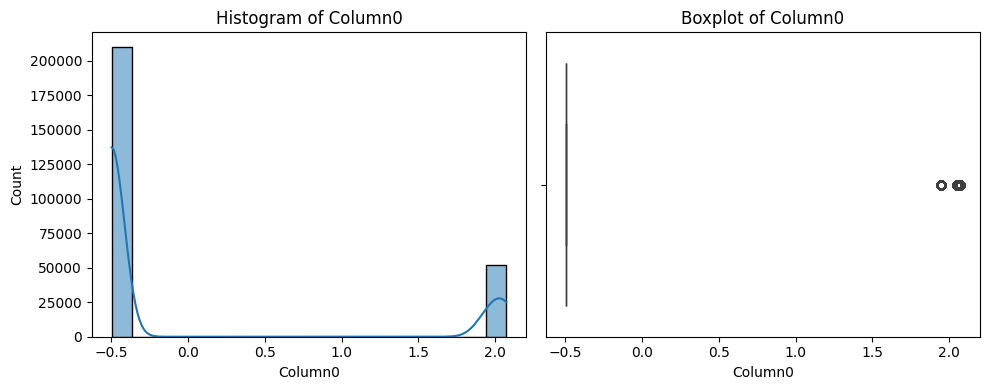

In [54]:
# Plot histogram and boxplot for 'Column0' in the test dataset
column_data = x_test['Column0']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column0')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column0')
plt.tight_layout()
plt.show()

#### • COLUMN 3

In [55]:
# Forward fill missing values in 'Column3' and apply Yeo-Johnson transformation
x_test["Column3"].fillna(x_test["Column3"].ffill(), inplace=True)
x_test['Column3'] = pt.fit_transform(x_test[['Column3']])

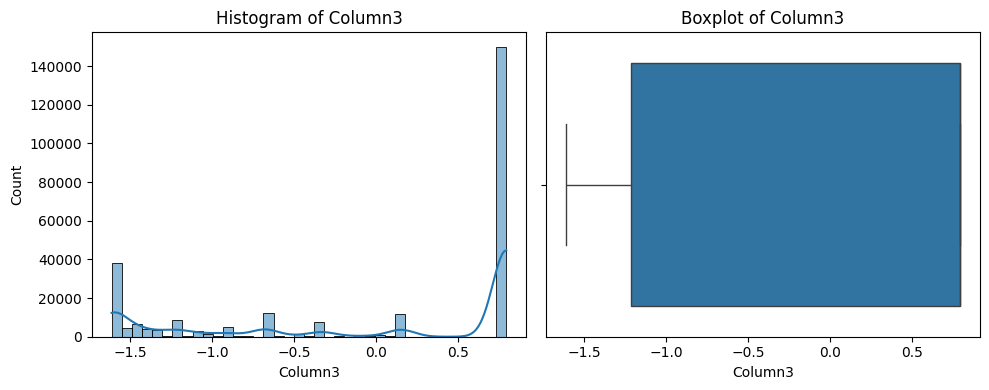

In [56]:
# Plot histogram and boxplot for 'Column3' in the test dataset
column_data = x_test['Column3']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column3')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column3')
plt.tight_layout()
plt.show()

#### • COLUMN 4

In [57]:
# Fill missing values in 'Column4' with the column mean and apply Yeo-Johnson transformation
x_test["Column4"].fillna(x_test["Column4"].mean(), inplace=True)
x_test["Column4"] = pt.fit_transform(x_test[["Column4"]])

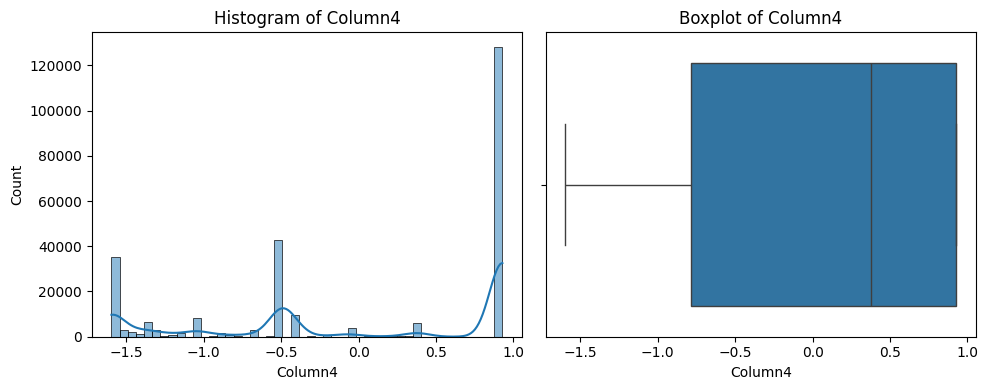

In [58]:
# Plot histogram and boxplot for 'Column4' in the test dataset
column_data = x_test['Column4']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column4')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column4')
plt.tight_layout()
plt.show()

#### • COLUMN 5

In [59]:
# Forward fill missing values in 'Column5' and apply Yeo-Johnson transformation
x_test["Column5"].fillna(x_test["Column5"].ffill(), inplace=True)
x_test['Column5'] = pt.fit_transform(x_test[["Column5"]])

In [60]:
# Remove outliers from 'Column5' in the test dataset using IQR
Q1 = x_test['Column5'].quantile(0.25)
Q3 = x_test['Column5'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
x_test = x_test[(x_test['Column5'] >= lower_bound) & (x_test['Column5'] <= upper_bound)]

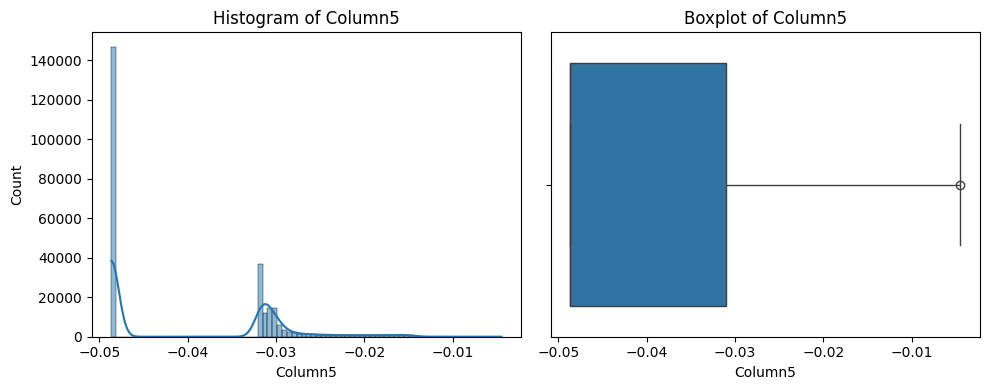

In [61]:
# Plot histogram and boxplot for 'Column5' in the test dataset
column_data = x_test['Column5']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column5')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column5')
plt.tight_layout()
plt.show()

#### • COLUMN 6

In [62]:
# Fill missing values in 'Column6' with the mode and apply Yeo-Johnson transformation
x_test["Column6"].fillna(x_test["Column6"].mode()[0], inplace=True)
x_test['Column6'] = pt.fit_transform(x_test[["Column6"]])

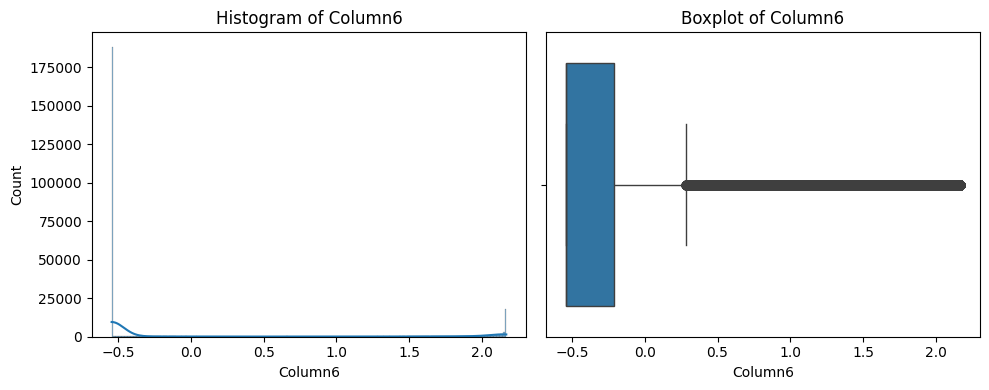

In [63]:
# Plot histogram and boxplot for 'Column6' in the test dataset
column_data = x_test['Column6']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column6')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column6')
plt.tight_layout()
plt.show()

#### • COLUMN 8

In [64]:
# Fill missing values in 'Column8' with the median and apply Yeo-Johnson transformation
x_test["Column8"].fillna(x_test["Column8"].median(), inplace=True)
x_test['Column8'] = pt.fit_transform(x_test[["Column8"]])

In [65]:
# Remove outliers from 'Column8' in the test dataset using IQR
Q1 = x_test['Column8'].quantile(0.25)
Q3 = x_test['Column8'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
x_test = x_test[(x_test['Column8'] >= lower_bound) & (x_test['Column8'] <= upper_bound)]

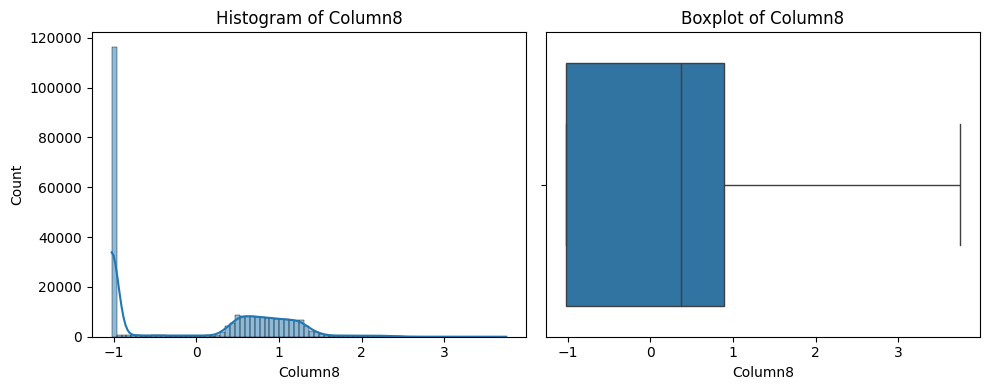

In [66]:
# Plot histogram and boxplot for 'Column8' in the test dataset
column_data = x_test['Column8']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column8')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column8')
plt.tight_layout()
plt.show()

#### • COLUMN 9

In [67]:
# Fill missing values in 'Column9' with the median and apply Yeo-Johnson transformation
x_test["Column9"].fillna(x_test["Column9"].median(), inplace=True)
x_test['Column9'] = pt.fit_transform(x_test[["Column9"]])

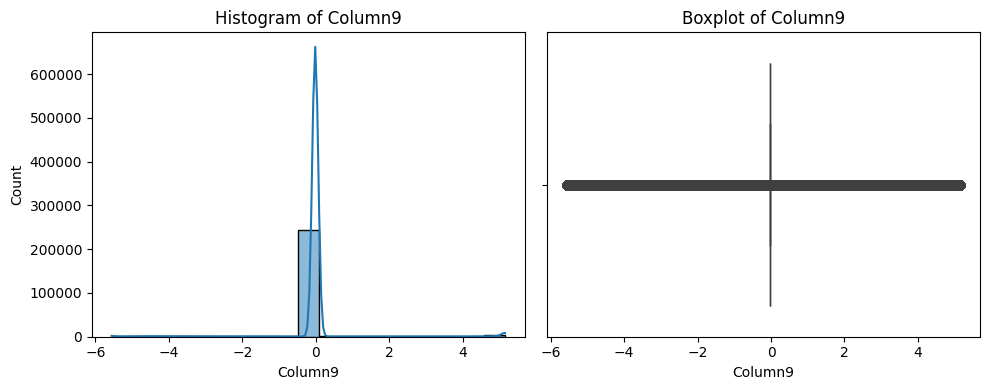

In [68]:
# Plot histogram and boxplot for 'Column9' in the test dataset
column_data = x_test['Column9']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column9')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column9')
plt.tight_layout()
plt.show()

#### • COLUMN 14

In [69]:
# Display the count of each unique value in 'Column14' in the test dataset
x_test["Column14"].value_counts()

Column14
0.001351    45238
0.001351    11622
0.001351     1699
0.001351     1130
0.001351      830
            ...  
0.001349        1
0.001351        1
0.001351        1
0.001351        1
0.001350        1
Name: count, Length: 21825, dtype: int64

In [70]:
# Fill missing values in 'Column14' with 0.001351 and apply Yeo-Johnson transformation
x_test["Column14"].fillna(0.001351, inplace=True) 
x_test['Column14'] = pt.fit_transform(x_test[["Column14"]])

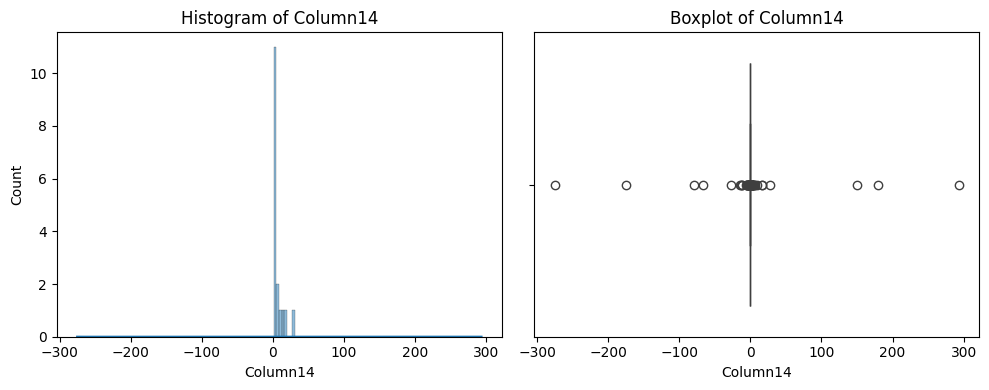

In [71]:
# Plot histogram and boxplot for 'Column14' in the test dataset
column_data = x_test['Column14']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0], binrange=(1,50))
axes[0].set_title('Histogram of Column14')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column14')
plt.tight_layout()
plt.show()

#### • COLUMN 15

In [72]:
# Fill missing values in 'Column15' with 0.00339 (most repeated value) and apply Yeo-Johnson transformation
x_test["Column15"].fillna(0.00339, inplace=True)
x_test['Column15'] = pt.fit_transform(x_test[["Column15"]])

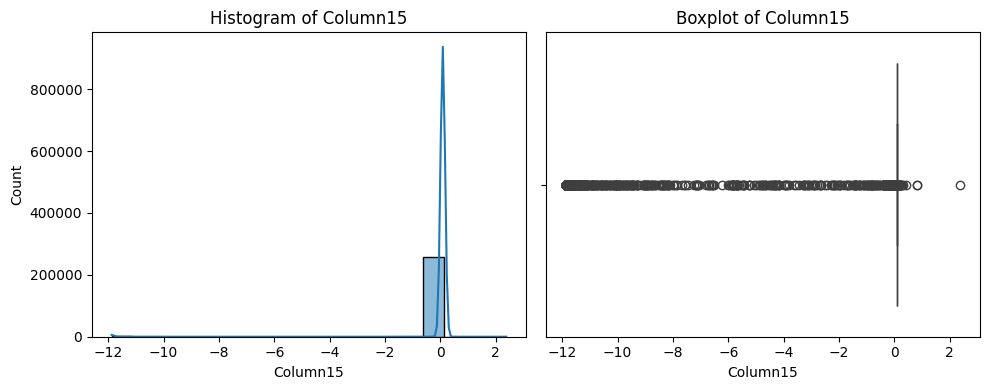

In [73]:
# Plot histogram and boxplot for 'Column15' in the test dataset
column_data = x_test['Column15']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Column15')
sns.boxplot(x=column_data, ax=axes[1])
axes[1].set_title('Boxplot of Column15')
plt.tight_layout()
plt.show()

Upon analyzing `Column0`, `Column6`, `Column9`, `Column14`, and `Column15`, the data shows a bimodal distribution with clusters around two distinct values, leaving a noticeable gap between groups. Negative values in some columns make transformations like `log1p` or `sqrt` problematic. Therefore, further outlier treatment or transformation may distort the analysis and isn't feasible. Additionally, extreme outliers in these columns have been removed to ensure a cleaner dataset.

In [74]:
# Reset the index of the test dataset and drop the old index
x_test.reset_index(drop=True, inplace=True)

In [75]:
# List columns in the test dataset with missing values
x_test.columns[x_test.isnull().any()]

Index([], dtype='object')

<Axes: >

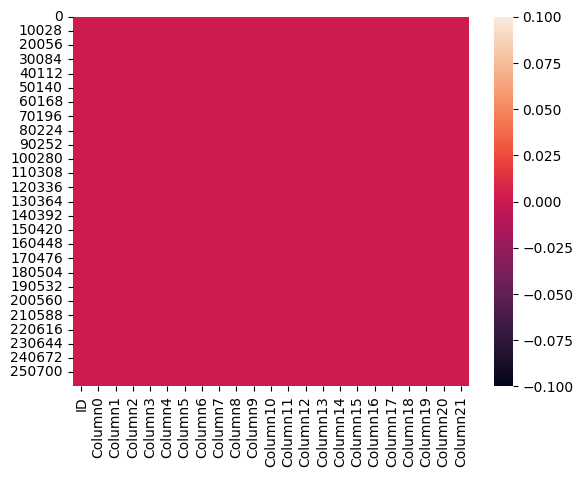

In [76]:
# Display a heatmap to visualize missing values in the test dataset
sns.heatmap(x_test.isnull())

# FEATURE ENGINEERING

### MERGING TARGET VARIABLE WITH TRAIN AND TEST DATA

In [77]:
# Merge training features and target datasets on the 'ID' column
x_train = pd.merge(x_train, y_train, on="ID")

In [78]:
# Merge test features and target datasets on the 'ID' column
x_test = pd.merge(x_test, y_test, on="ID")

### DROPPING 'ID' AS IT IS JUST AN IDENTIFIER  

In [79]:
# Drop the 'ID' column from the training dataset
x_train.drop("ID", axis=1, inplace=True)

In [80]:
# Drop the 'ID' column from the test dataset
x_test.drop("ID", axis=1, inplace=True)

In [81]:
# Display the shape of the training dataset
x_train.shape

(782004, 23)

In [82]:
# Display the shape of the test dataset
x_test.shape

(260725, 23)

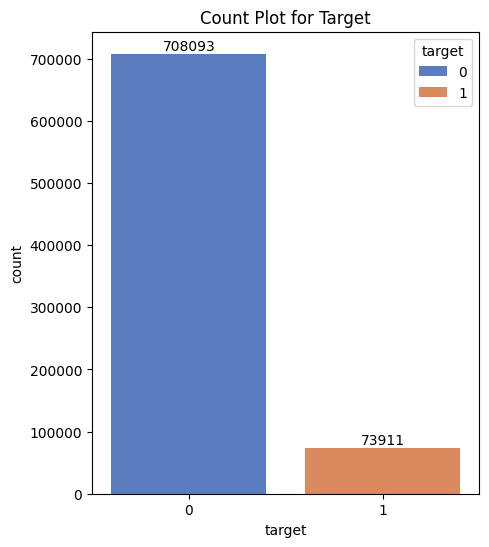

In [83]:
# Create a count plot for the 'target' column in the training dataset
plt.figure(figsize=(5, 6))
plot = sns.countplot(x=x_train["target"], palette='muted', hue=x_train["target"])
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title("Count Plot for Target")
plt.show()

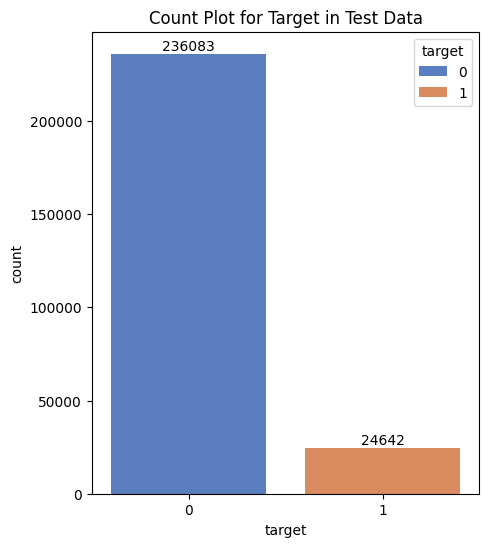

In [84]:
# Create a count plot for the 'target' column in the test dataset
plt.figure(figsize=(5, 6))
plot = sns.countplot(x=x_test["target"], palette='muted', hue=x_test["target"])
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title("Count Plot for Target in Test Data")
plt.show()

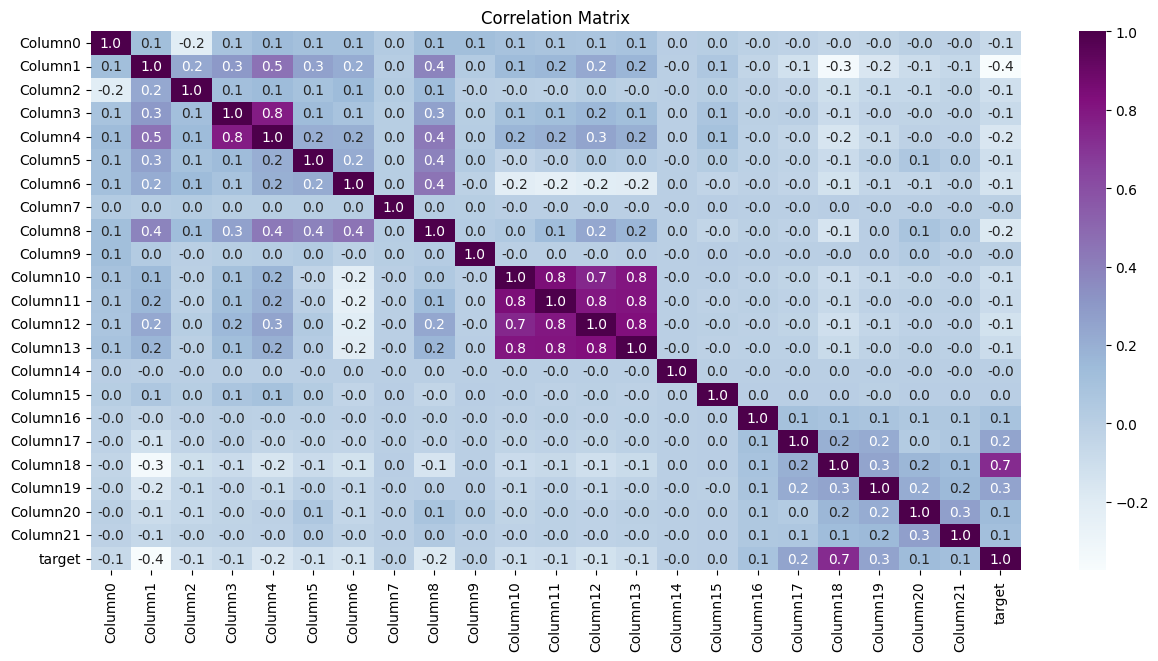

In [85]:
# Display the correlation matrix of the training dataset
plt.figure(figsize=(15, 7))
sns.heatmap(x_train.corr(), annot=True, fmt=".1f", cmap="BuPu")
plt.title("Correlation Matrix")
plt.show()

In [86]:
# Separate features and target variable in the training dataset
train_features = x_train.drop("target", axis=1)
train_target = x_train["target"]

### MUTUAL INFORMATION GAIN 

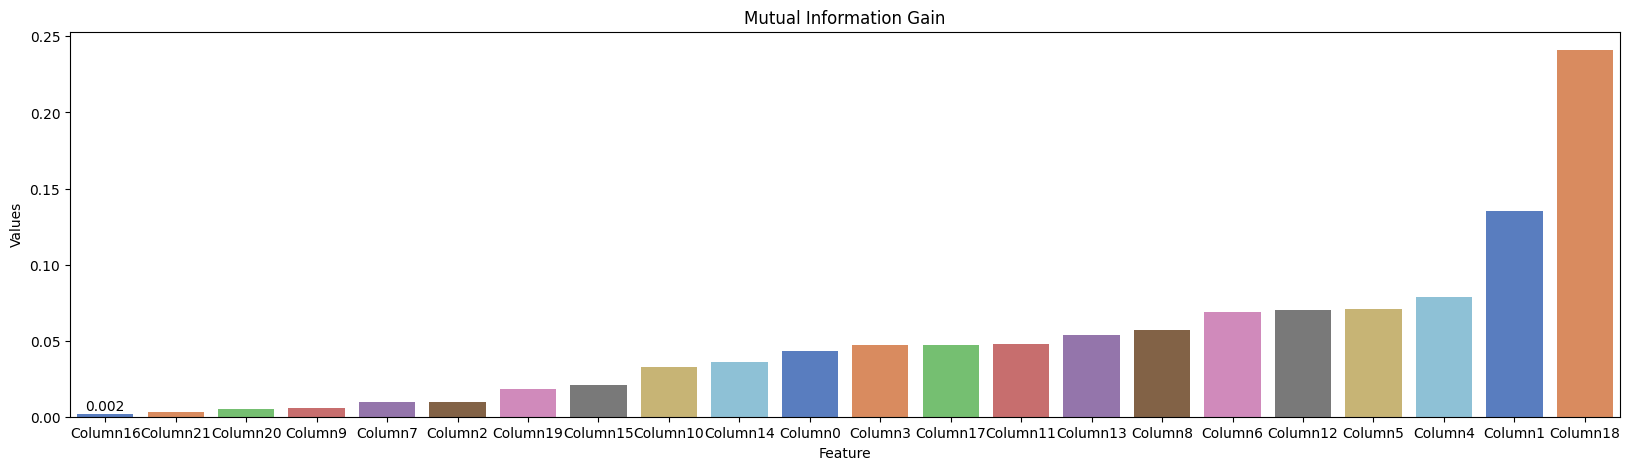

In [87]:
# Compute mutual information gain for features
values = mutual_info_classif(train_features, train_target)
mutual_info = pd.Series(values, index=train_features.columns)
df = pd.DataFrame({"Feature": mutual_info.index, "Values": mutual_info})
df.sort_values(ascending=True, by="Values", inplace=True)
df["Values"] = df["Values"].round(3)

# Plot mutual information gain
plt.figure(figsize=(20, 5))
bar = sns.barplot(x="Feature", y="Values", data=df, hue="Feature", palette='muted')
bar.bar_label(bar.containers[0])
plt.title("Mutual Information Gain")
plt.show()

### SELECTING FEATURES BASED ON HEATMAP AND MUTUAL INFORMATION GAIN

In [88]:
# Drop columns with low mutual information scores based on feature selection
train_features.drop(["Column16", "Column21", "Column20", "Column9", "Column7", 
                     "Column2", "Column5", "Column10", "Column19", "Column11", 
                     "Column15", "Column13"], axis=1, inplace=True)

In [89]:
# Checking the dimensions of the target features after removing unnecessary columns
train_features.shape

(782004, 10)

In [90]:
# Separating test features and target
test_features = x_test.drop(["Column16", "Column21", "Column20", "Column9", "Column7", 
                             "Column2", "Column5", "Column10", "Column19", "Column11", 
                             "Column15", "Column13", "target"], axis=1)
test_target = x_test["target"]


In [91]:
# Checking the dimensions of the test features after removing unnecessary columns
test_features.shape

(260725, 10)

# MODEL BUILDING

In [92]:
# Initialize and fit the RandomForest model
model = RandomForestClassifier(n_estimators=300, 
                               max_depth=10, 
                               min_samples_split=4)
fitting = model.fit(train_features, train_target)

# Make predictions
train_prediction = model.predict(train_features)
test_prediction = model.predict(test_features)

# MODEL PERFORMANCE

### TRAINING ACCURACY

In [93]:
# Calculate training accuracy
train_accuracy = accuracy_score(train_target, train_prediction)
print("Training Accuracy: ", round(train_accuracy, 2))

Training Accuracy:  0.98


### TESTING ACCURACY

In [94]:
# Calculate testing accuracy
test_accuracy2=accuracy_score(test_prediction,test_target)
print("Test Accuracy: ",test_accuracy2.round(2))

Test Accuracy:  0.98


### MEAN SQUARED ERROR

In [95]:
# Calculate Mean Squared Error for the test set
mse = mean_squared_error(test_prediction, test_target)
round(mse, 3)

0.024

### CLASSIFICATION REPORT

In [96]:
# Generate and print the classification report for the test set predictions
report = classification_report(test_prediction, test_target)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    232911
           1       0.94      0.83      0.88     27814

    accuracy                           0.98    260725
   macro avg       0.96      0.91      0.93    260725
weighted avg       0.98      0.98      0.98    260725



### CONFUSION MATRIX

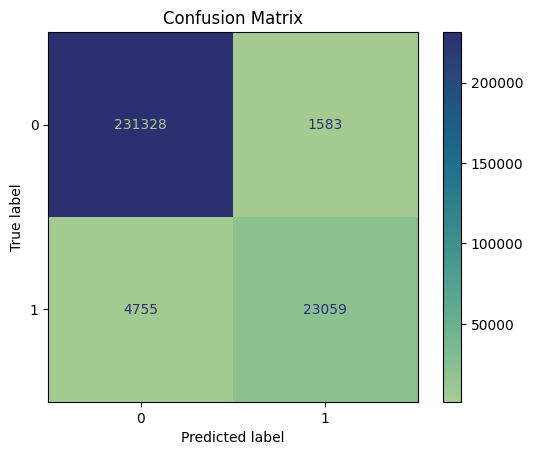

In [97]:
# Compute the confusion matrix
matrix2 = confusion_matrix(test_prediction, test_target)

# Display confusion matrix
cm2 = ConfusionMatrixDisplay(matrix2, display_labels=["0", "1"])
cm2.plot(cmap="crest")

# Show the plot
plt.title("Confusion Matrix")
plt.show()

### AUC-ROC CURVE

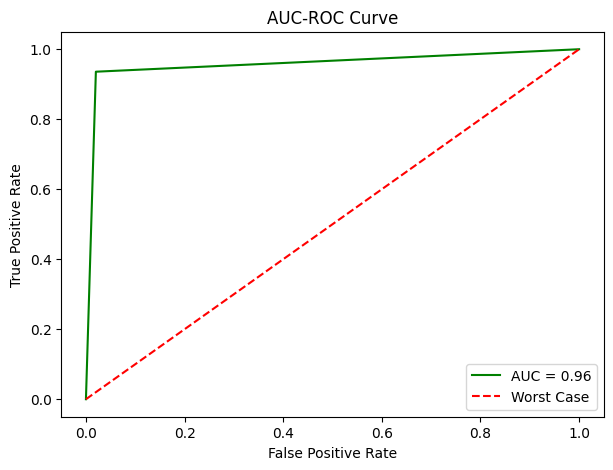

In [98]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(test_target, test_prediction)

# Compute AUC and round to 2 decimal places
roc_auc = round(auc(fpr, tpr), 2)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='AUC = ' + str(roc_auc), color="g")
plt.plot([0, 1], [0, 1], label="Worst Case", linestyle="--", color="red")

# Label and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")

# Show the plot
plt.show()